In [14]:
import math
import numpy as np
import UsefulFunctions as uf
import json
import matplotlib
# matplotlib.rcParams["backend"] = "TkAgg"
from matplotlib import pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from MMILegend import mmimap, mmi_cmap, draw_colorbar

plt.rcParams.update({'font.size': 12})


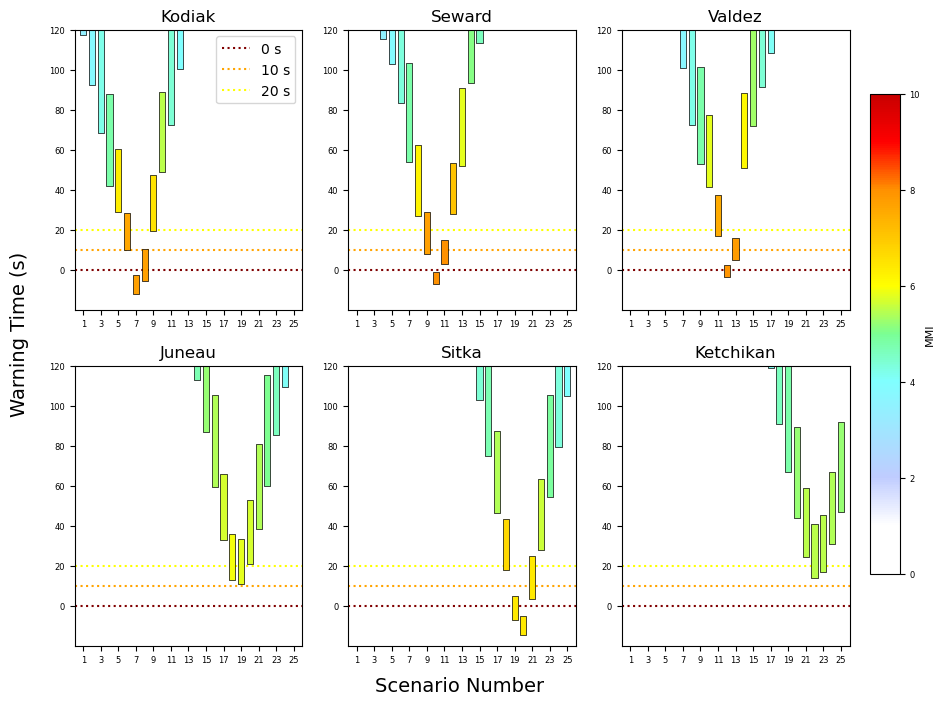

In [15]:
eq_labels = []
for i in range(1, 14):
    eq_labels.append(f'ALU{i}')
for i in range(14, 16):
    eq_labels.append(f'CSE{i}')
for i in range(16, 26):
    eq_labels.append(f'QCF{i}')

with open('Data/Southern Alaska Coast/Community Data.json') as json_file:
    comm_dict = json.load(json_file)
# print(len(comm_dict.keys()))

plt.rc('axes', titlesize=10, labelsize=8)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

fig, ax = plt.subplots(2, 3, figsize=(10, 8))
plots = {}
wt_min = 100
wt_max = 0
warn_colors = ['maroon', 'orange', 'yellow']

width = 0.7
lw = 0.5

for name, data in comm_dict.items():
    if name in ['Kodiak', 'Seward', 'Valdez', 'Juneau', 'Sitka', 'Ketchikan']:
        if min(data['wtfast']) < wt_min:
            wt_min = min(data['wtfast'])
        if max(data['wtslow']) > wt_max:
            wt_max = max(data['wtslow'])
    else:
        continue

for name, data in comm_dict.items():
    if name == 'Kodiak':
        index = (0, 0)
    elif name == 'Seward':
        index = (0, 1)
    elif name == 'Valdez':
        index = (0, 2)
    elif name == 'Juneau':
        index = (1, 0)
    elif name == 'Sitka':
        index = (1, 1)
    elif name == 'Ketchikan':
        index = (1, 2)
    else:
        continue
        
    # warning time lines for 0, 10, 20 seconds
    for i in range(0, 3):
        ax[index].axhline(i * 10, lw=1.5, c=warn_colors[i], ls=':', zorder=0, label='%i s' % (i * 10))
    
    wt = ax[index].scatter(range(1, 26), data['wtfast'], s=0, marker='o', c=data['mmi'], cmap=mmi_cmap,
                           vmin=0, vmax=10, zorder=0, linewidth=0, edgecolor='k', alpha=1)
    color = np.array([mmi_cmap(i/10) for i in data['mmi']])

    # https://matplotlib.org/stable/gallery/statistics/errorbars_and_boxes.html#sphx-glr-gallery-statistics-errorbars-and-boxes-py
    # code for plotting rectangle ranges of warning time
    wtboxes = [Rectangle((x-width/2,y), width, height) for x, y, height in zip(range(1,26), data['wtfast'], np.array(data['wtslow'])-np.array(data['wtfast']))]
    pc = PatchCollection(wtboxes, color=color, cmap=mmi_cmap, linewidth=lw, edgecolor='k')
    ax[index].add_collection(pc)
    
    # code for plotting ranges with arrows instead of rectangles
    # yerr = np.array(data['wtslow'])-np.array(data['wtfast'])
    # for i in range(25):
    #     plotline1, caplines1, barlinecols1 = ax[index].errorbar(i+1, data['wtfast'][i], yerr=yerr[i], mfc=color[i], mec='k', mew=lw,
    #                                                                 lolims=True, ecolor='k', elinewidth=lw, fmt='o')
    #     caplines1[0].set_marker('_')

    ax[index].set_title(name, fontsize=12)
    ax[index].set_ylim(wt_min-5, 120)
    ax[index].set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])
    ax[index].set_xlim(0,26)
    if name == 'Kodiak':
        ax[index].legend(loc='upper right', fontsize=10)
# plt.clim[1,8]
# plt.rc('xtick', labelsize=12)
cbar_ax = fig.add_axes([0.92, 0.2, 0.03, 0.6])
fig.colorbar(wt, cax=cbar_ax, orientation='vertical', label='MMI')
# fig.colorbar(wt, cax=cbar_ax, orientation='horizontal', label='MMI')
plt.rc('xtick', labelsize=12)
# plt.xlim(0, 26)
# draw_colorbar(fig, mmimap, None)
# plt.text(0.48, 1.2, 'MMI', fontsize=16)
# plt.suptitle('Newlist Community Scenario Data', fontsize=18)
fig.text(0.51, 0.06, 'Scenario Number', ha='center', va='center',fontsize=14)
fig.text(0.07, 0.5, 'Warning Time (s)', ha='center', va='center', rotation='vertical',fontsize=14)
# plt.tight_layout(rect=[0.07, 0.04, 0.95, 1])
plt.savefig('Figures/CoastalScenarios/Coastal Community Data_errows.pdf')
plt.savefig('Figures/CoastalScenarios/Coastal Community Data_errows.png', dpi=700)
plt.show()


In [47]:
color = np.array([mmi_cmap(i/10) for i in data['mmi']]) * 255
for c in color: print(f'<h2 style="background-color:rgba{tuple(c)};">rgba(255, 99, 71, 0)</h2>')

<h2 style="background-color:rgba(146.8235294117647, 240.29411764705884, 255.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(134.27450980392157, 250.09803921568627, 255.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(126.82352941176471, 255.0, 233.8235294117647, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(123.29411764705883, 255.0, 170.2941176470589, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(255.0, 237.7450980392157, 0.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(255.0, 166.5686274509804, 0.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(255.0, 160.09803921568627, 0.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(255.0, 160.09803921568627, 0.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(255.0, 226.9607843137255, 0.0, 255.0);">rgba(255, 99, 71, 0)</h2>
<h2 style="background-color:rgba(187.196078431

In [45]:
print(color)

[[146.82352941 240.29411765 255.         255.        ]
 [134.2745098  250.09803922 255.         255.        ]
 [126.82352941 255.         233.82352941 255.        ]
 [123.29411765 255.         170.29411765 255.        ]
 [255.         237.74509804   0.         255.        ]
 [255.         166.56862745   0.         255.        ]
 [255.         160.09803922   0.         255.        ]
 [255.         160.09803922   0.         255.        ]
 [255.         226.96078431   0.         255.        ]
 [187.19607843 255.          74.94117647 255.        ]
 [125.64705882 255.         212.64705882 255.        ]
 [128.         255.         255.         255.        ]
 [138.03921569 247.15686275 255.         255.        ]
 [128.         255.         255.         255.        ]
 [134.2745098  250.09803922 255.         255.        ]
 [144.31372549 242.25490196 255.         255.        ]
 [146.82352941 240.29411765 255.         255.        ]
 [150.58823529 237.35294118 255.         255.        ]
 [154.3529